In [1]:
import pandas as pd
import datetime

In [2]:
intraday = pd.DataFrame(columns=['date', 'price'])

In [3]:
with open("additional_data/4_aapl.txt", "r") as stock:
    for line in stock:
        el = line.split(" ")[0]+" "+ line.split(" ")[1]
        data = datetime.datetime.strptime(line.split(" ")[0]+" "+ line.split(" ")[1], '%Y-%m-%d %H:%M:%S')
        intraday = intraday.append({'date': data, 'price': float(line.split(" ")[-1].strip())}, ignore_index=True)

In [4]:
intraday.head()

,date,price
0,2016-01-04 09:45:00,100.021
1,2016-01-04 09:46:00,100.129
2,2016-01-04 09:47:00,100.399
3,2016-01-04 09:48:00,100.286
4,2016-01-04 09:49:00,100.343


In [5]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)


period_df = intraday#[(intraday['date'] > '2016-02-01') & (intraday['date'] < '2016-03-01')]

plt.plot(period_df['date'], period_df['price'].astype(float))
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

In [6]:
period_df.head()

,date,price
0,2016-01-04 09:45:00,100.021
1,2016-01-04 09:46:00,100.129
2,2016-01-04 09:47:00,100.399
3,2016-01-04 09:48:00,100.286
4,2016-01-04 09:49:00,100.343


In [7]:
daily = pd.DataFrame(columns=['date', 'open', 'high', 'low', 'close'])

d = intraday['date'].values[0]


cur_day = pd.to_datetime(d).date().day
prices = list()
for idx, el in enumerate(intraday['date'].values):
    if pd.to_datetime(el).date().day == cur_day:
        prices.append(intraday['price'].values[idx])
    else:
        daily = daily.append({'date': pd.to_datetime(intraday['date'].values[idx-1]), 'open': prices[0], 'high': max(prices), 'low': min(prices), 'close': prices[-1]}, ignore_index=True)
        prices = list()
        prices.append(intraday['price'].values[idx])
        cur_day = pd.to_datetime(el).date().day

In [8]:
daily.head()

,date,open,high,low,close
0,2016-01-04 15:45:00,100.0210,102.6220,99.8168,102.1300
1,2016-01-05 15:45:00,102.0840,102.1540,99.7876,100.0120
2,2016-01-06 15:45:00,98.3461,99.6902,97.4120,97.8785
3,2016-01-07 15:45:00,95.9694,97.4889,94.0896,94.6545
4,2016-01-08 15:45:00,95.2097,96.5120,94.2844,94.6253


Populating the interactive namespace from numpy and matplotlib


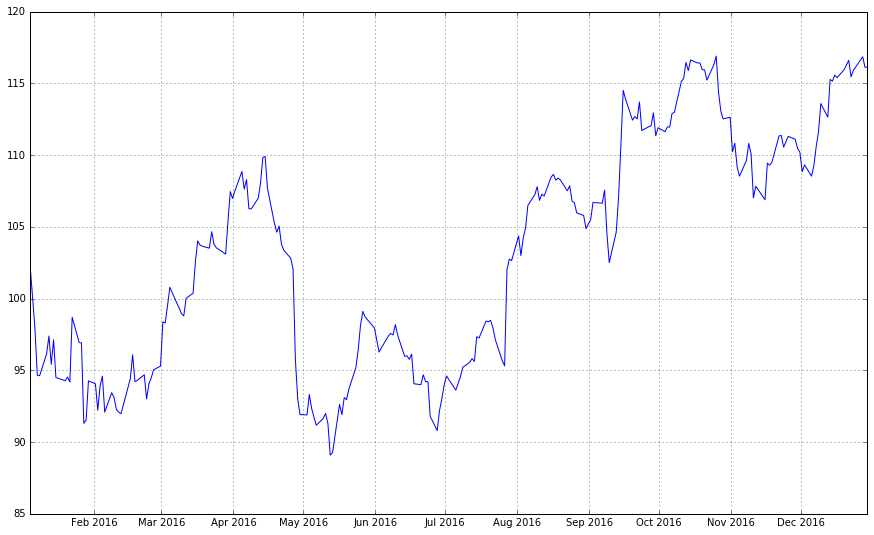

In [9]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
plt.grid(True)
#daily["close"].plot(grid = True) # Plot the adjusted closing price of AAPL

plt.plot(daily['date'], daily['close'])

In [10]:
daily.head()

,date,open,high,low,close
0,2016-01-04 15:45:00,100.0210,102.6220,99.8168,102.1300
1,2016-01-05 15:45:00,102.0840,102.1540,99.7876,100.0120
2,2016-01-06 15:45:00,98.3461,99.6902,97.4120,97.8785
3,2016-01-07 15:45:00,95.9694,97.4889,94.0896,94.6545
4,2016-01-08 15:45:00,95.2097,96.5120,94.2844,94.6253


/home/ostapkharysh/.local/lib/python3.5/site-packages/ipykernel_launcher.py:14: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


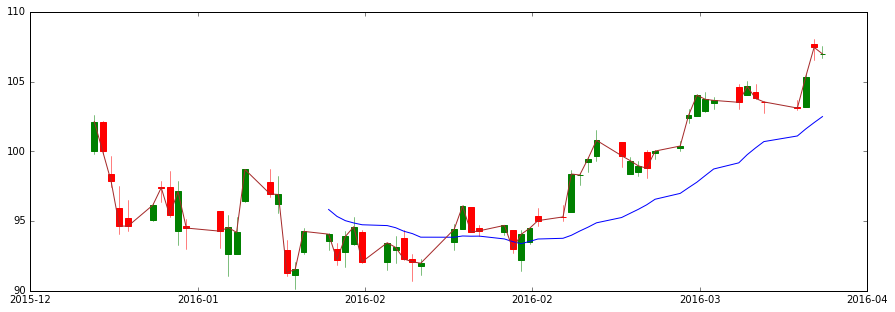

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from matplotlib.finance import candlestick_ohlc

import matplotlib.dates as mdates


df = daily.copy()

start = datetime.datetime.strptime("2016-01-01", '%Y-%m-%d').date()
finish = datetime.datetime.strptime("2016-04-01", '%Y-%m-%d').date()

df = df[(df['date'] > start) & (df['date'] < finish)]

# Converting date to pandas datetime format
df['date'] = pd.to_datetime(df['date'])
df["date"] = df["date"].apply(mdates.date2num)

ohlc= df[['date', 'open', 'high', 'low','close']].copy()

ohlc['SMA20'] = ohlc["close"].rolling(20).mean()
f1, ax = plt.subplots(figsize = (15,5))

# plot the candlesticks
candlestick_ohlc(ax, ohlc.values, width=.7, colorup='green', colordown='red')
#ax.plot(ohlc['date'], ohlc['SMA5'], color = 'green', label = 'SMA5')
ax.plot(ohlc['date'], ohlc['SMA20'], color = 'blue', label = 'SMA20')
ax.plot(ohlc['date'], ohlc['close'], color = "brown", label = 'close')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# Saving image
#plt.savefig('OHLC.png')

plt.show()


In [12]:
import sqlite3

conn = sqlite3.connect("////media/ostapkharysh/SP_PHD_U3/database/NO_title.db")
c = conn.cursor()


sql = '''SELECT DATE, TONE, DOCUMENTIDENTIFIER FROM news where date > 20160101000000 and date < 20160701000000'''
unf_TONE = pd.DataFrame({"date": [], "tone": []})
res = c.execute(sql)
for el in res:
    unf_TONE = unf_TONE.append({'date': el[0], 'tone': el[1].split(',')[0], 'source': el[2]}, ignore_index=True)

In [13]:
unf_TONE.head()

,date,tone,source
0,20160101001500,-0.656814449917899,http://www.deseretnews.com/article/865644657/C...
1,20160101001500,1.0183299389002,http://www.havenews.com/article/ZZ/20151231/SH...
2,20160101001500,-5.27065527065527,http://www.rockdalecitizen.com/news/local/magn...
3,20160101001500,-1.92982456140351,http://www.businessfinancenews.com/27117-how-u...
4,20160101001500,-2.93193717277487,http://news.morningstar.com/all/dow-jones/us-m...


In [14]:
len(unf_TONE)

491411

In [15]:
TONE = pd.DataFrame({"date": [], "tone": []})

for idx, el in enumerate(unf_TONE.values):
    if 'apple' in el[2]:
        TONE = TONE.append({"date": datetime.datetime.strptime(el[0], '%Y%m%d%H%M%S'), "tone" : float(el[1])}, ignore_index=True )

In [16]:
len(TONE)

173965

In [17]:
TONE.head()

,date,tone
0,2016-01-01 00:15:00,0.625000
1,2016-01-01 00:30:00,-5.526770
2,2016-01-01 00:30:00,-3.017833
3,2016-01-01 00:30:00,-5.526770
4,2016-01-01 00:45:00,0.625000


In [18]:
TONE_15_M = pd.DataFrame({'date': [], 'tone': []})
d = TONE.values[0][0]
tones = list()
print(d)
for el in TONE.values:
    if el[0] == d:
        tones.append(float(el[1]))
    else:
        TONE_15_M =TONE_15_M.append({'date': d, 'tone': float(sum(tones)/len(tones))},  ignore_index=True)
        d = el[0]
        tones.append(float(el[1]))
TONE_15_M = TONE_15_M.append({'date': d, 'tone': float(sum(tones)/len(tones))}, ignore_index=True)

2016-01-01 00:15:00


In [19]:
TONE_15_M.tail()

,date,tone
16443,2016-06-19 11:15:00,-0.735818
16444,2016-06-21 23:30:00,-0.735783
16445,2016-06-24 11:30:00,-0.735782
16446,2016-06-26 23:30:00,-0.735770
16447,2016-06-29 13:15:00,-0.735716


In [20]:
intraday.head()

,date,price
0,2016-01-04 09:45:00,100.021
1,2016-01-04 09:46:00,100.129
2,2016-01-04 09:47:00,100.399
3,2016-01-04 09:48:00,100.286
4,2016-01-04 09:49:00,100.343


### Tone visualization

3125
3125
2016-01-04 09:45:00


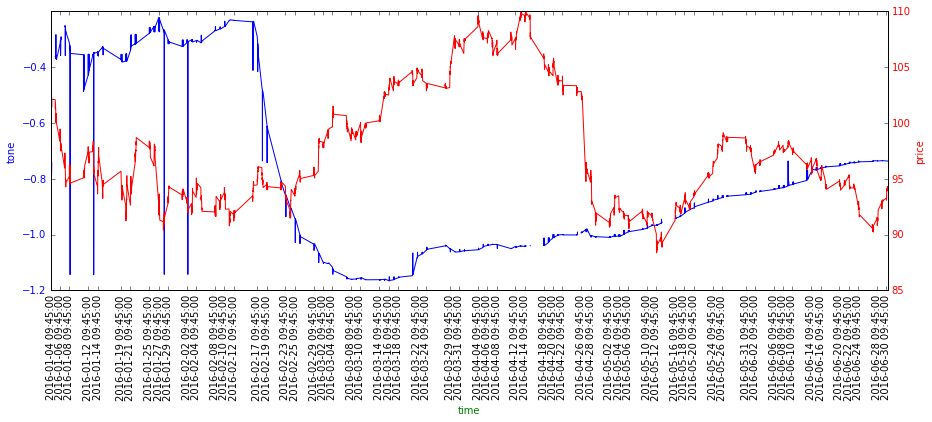

In [22]:
import numpy as np
df_tone = TONE_15_M

start = datetime.datetime.strptime("2016-01-04 09:00:00", '%Y-%m-%d %H:%M:%S')
finish = datetime.datetime.strptime("2016-06-30 18:00:00", '%Y-%m-%d %H:%M:%S')

step = datetime.timedelta(minutes=15)
t = start

time = list()
while t < finish:
    time.append(t)
    t+=step

    
df_tone = df_tone[(df_tone['date'] >= start) & (df_tone['date'] < finish)]
days = intraday[(intraday['date'] >= start) & (intraday['date'] < finish)]

day = pd.DataFrame({'date':[], 'price': []})
f = start
while f < finish:
    if f in days.values:
        day = day.append({'date': f, 'price': days.loc[days['date'] == f].values[0][1]}, ignore_index=True)
    f+=step

#day['price'] = day['price']-(sum(day['price'])/len(day['price']))

lack_tone = list(set(time) - set(list(df_tone['date'])))
lack_intraday = list(set(time) - set(list(intraday['date'])))

for x in lack_tone:
    df_tone = df_tone.append({'date': x, 'tone': np.nan}, ignore_index=True)
    
for x in lack_intraday:
    #day = day.append({'date': x, 'price': np.nan}, ignore_index=True)
    df_tone = df_tone[df_tone['date'] != x]
    time.remove(x)
print(len(df_tone))
print(len(day))
    
df_tone = df_tone.sort_values(by=['date'])    
day = day.sort_values(by=['date'])


# Converting date to pandas datetime format
df_tone['date'] = pd.to_datetime(df_tone['date'])
df_tone['date'] = df_tone["date"].apply(mdates.date2num)

day["date"] = pd.to_datetime(day["date"])
day["date"] = day["date"].apply(mdates.date2num)


f1, ax1 = plt.subplots(figsize = (15,5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H-%M-%S'))

ax1.set_ylabel('tone', color='blue')
ax1.plot(time, df_tone['tone'], color = 'blue')
ax1.tick_params(axis='y', labelcolor='blue')
time_labels = [str(t) for t in time if time.index(t) % 50 ==0]
ax1.set_xlabel('time', color='green')
ax1.xaxis.set_ticks(time_labels)
ax1.set_xticklabels(time_labels, rotation='vertical', fontdict=None, minor=False)
print(time[0])


ax2 = ax1.twinx()  
ax2.set_ylabel('price', color='red')
ax2.plot(time, day['price'], color='red')
ax2.tick_params(axis='y', labelcolor='red')